# VARモデル・共和分分析を用いた死因別死亡率の分析

In [1]:
library(vars) 

library(urca)
library(ggplot2)

library(tsDyn)
library(ggfortify)
                  # Install & load xts package
library("xts")
library(tidyverse)

Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'ggfortify' was built under R version 4.1.3"
Registered S3 methods overwritten by 'ggfortify':
  method                 from    
  autoplot.Arima         forecast
  autoplot.acf           forecast
  autoplot.ar            forecast
  autoplot.bats          forecast
  autoplot.decomposed.ts forecast
  autoplot.ets           forecast
  autoplot.forecast      forecast
  autoplot.stl           forecast
  autoplot.ts            forecast
  fitted.ar              forecast
  fortify.ts             forecast
  residuals.ar           forecast

Warning message:
"p

In [2]:
#ディレクトリの指定
setwd("C:/Users/ai190/OneDrive/デスクトップ/M1/Seminor/Rcodes/月別死亡率データ/WHOMD")
getwd() 


#人口データの読み込み
pop = read_csv("pop")
pop_jp = pop[pop$Country == 3160,1:7]
pop_jp_male = pop_jp[pop_jp$Sex == 1 & (pop_jp$Year >= 1979)& (pop_jp$Year <= 2016) ,c("Year","Pop1")]
#pop_jp_male

[1] "C:/Users/ai190/OneDrive/デスクトップ/M1/Seminor/Rcodes/月別死亡率データ/WHOMD"

Rows: 9913 Columns: 33
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (2): SubDiv, Frmat
dbl (31): Country, Admin1, Year, Sex, Pop1, Pop2, Pop3, Pop4, Pop5, Pop6, Po...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,Pop1
<dbl>,<dbl>
1979,57180400
1980,57593800
1981,58002300
1982,58402100
1983,58434000
1984,58793000
1985,59044000
1986,59438000
1987,59723000


In [5]:
#ディレクトリの指定
setwd("C:/Users/ai190/OneDrive/デスクトップ/M1/Seminor/Rcodes/月別死亡率データ/WHOMD")
getwd() 


#死亡率データの読み込み
MortNum_JP_male = read.csv("CoD_Male_JP.csv", header= T, sep=",",fileEncoding = "UTF-8-BOM")
Mort_rate_jp_male =  MortNum_JP_male[,2:6] / as.matrix(pop_jp_male[2])
Mort_rate_jp_male = cbind(year = MortNum_JP_male[,1], Mort_rate_jp_male)

[1] "C:/Users/ai190/OneDrive/デスクトップ/M1/Seminor/Rcodes/月別死亡率データ/WHOMD"

In [6]:
Mort_rate_jp_male[1:5,]

,year,IandP,Cancer,Circulatory,Respiratory,External
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1979,0.0001362180,0.001634196,0.002610230,0.0004904653,0.0006312827
2,1980,0.0001306912,0.001682004,0.002722932,0.0005727873,0.0006239040
3,1981,0.0001238227,0.001722966,0.002643912,0.0005678223,0.0006190272
4,1982,0.0001161260,0.001754954,0.002525628,0.0006009030,0.0006227173
5,1983,0.0001226854,0.001828114,0.002548448,0.0006698497,0.0006912927


In [7]:
ts = log(Mort_rate_jp_male[,2:6])
jo = ca.jo(log_mort_ts, type = "trace", ecdet = "none", K = 2, spec = "transitory")
summary(jo)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.65597624 0.58971570 0.40764070 0.17796764 0.06871518

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 4 |  2.56  6.50  8.18 11.65
r <= 3 |  9.62 15.66 17.95 23.52
r <= 2 | 28.47 28.71 31.52 37.22
r <= 1 | 60.54 45.23 48.28 55.43
r = 0  | 98.96 66.49 70.60 78.87

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                 IandP.l1  Cancer.l1 Circulatory.l1 Respiratory.l1 External.l1
IandP.l1        1.0000000  1.0000000       1.000000        1.00000   1.0000000
Cancer.l1      -3.4544520 -1.9099461      73.807695       43.78709  -1.0258998
Circulatory.l1 -1.7247708 -1.9989456       2.050872       90.65947  -0.3835259
Respiratory.l1  1.3572715  0.9703925     -45.813662      -32.61201   2.6637540
External.l1     0.3444682 -0.1228856     -35.967639      -14.533

In [43]:
mort.vec2var = vec2var(jo,r = 2)
summary(mort.vec2var)

              Length Class  Mode   
deterministic   5    -none- numeric
A               2    -none- list   
p               1    -none- numeric
K               1    -none- numeric
y             190    -none- numeric
obs             1    -none- numeric
totobs          1    -none- numeric
call            3    -none- call   
vecm            1    ca.jo  S4     
datamat       576    -none- numeric
resid         180    -none- numeric
r               1    -none- numeric

In [53]:
#vec2var_cod$A
resid_m = mort.vec2var$resid
matcov = as.matrix(cov(resid_m, y = resid_m))
sigma_resid_diag = diag(matcov)

#sigma_resid_trace
rooted_sigma_resid_m = sqrt(sigma_resid_diag)
#rooted_sigma_resid_m


In [67]:
# Impulse Responce
N_ahead = 10
irfIandP = irf(mort.vec2var, impulse = "IandP", n.ahead = N_ahead,
ortho = TRUE, cumulative = FALSE, boot = TRUE, ci = 0.95,
runs = 100, seed = 234)


irfIandP_scaled = irfIandP$irf$IandP / rooted_sigma_resid_m[1]
irf_time = as.data.frame(seq(0,length.out = 11 ))

irfIandP_scaled_df = as.data.frame(irfIandP_scaled) 

irfIandP_scaled_df = cbind(time = irf_time , irfIandP_scaled_df)
colnames(irfIandP_scaled_df)[1] = "time"
irfIandP_scaled_df



time,IandP,Cancer,Circulatory,Respiratory,External
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.9860133,0.1150532,0.2010228,0.47523314,0.7155125
1,1.2367263,0.2484466,0.1838725,0.05184457,0.5563933
2,1.1993689,0.2810001,0.1412809,-0.09158623,0.5554897
3,1.1665855,0.2828208,0.1430336,-0.18239796,0.6145446
4,1.1272151,0.2734395,0.1326489,-0.23326702,0.6110925
5,1.1110747,0.2635045,0.1330487,-0.24991533,0.6173786
6,1.1034415,0.2542040,0.1355816,-0.26378771,0.6163032
7,1.0982177,0.2454586,0.1376413,-0.27366591,0.6121359
8,1.0951764,0.2373585,0.1404946,-0.28198983,0.6089106


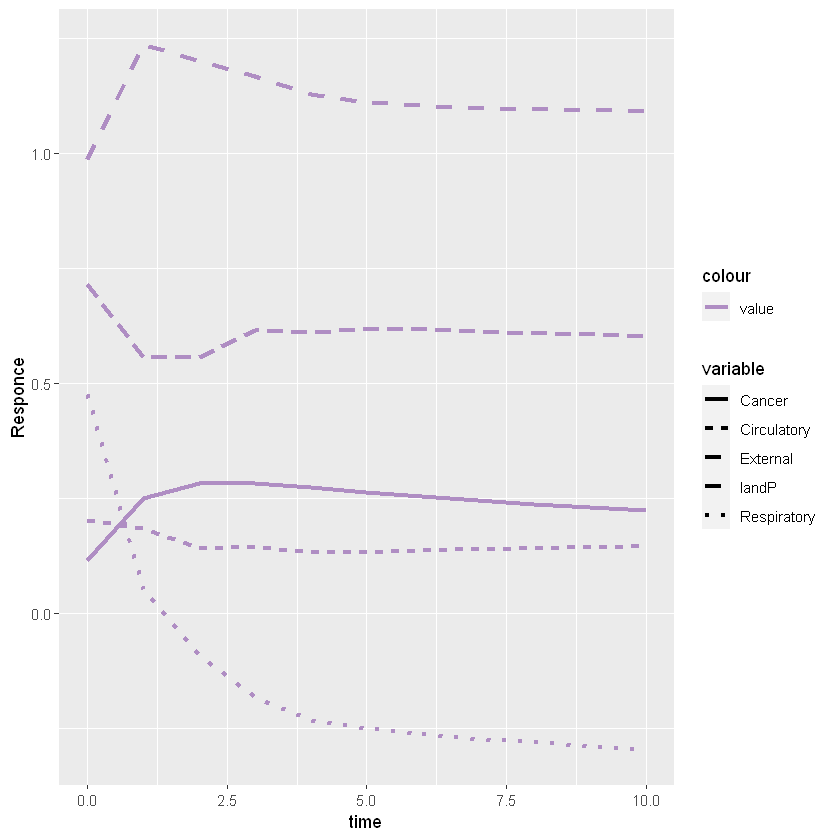

In [86]:
tid_IandP <- irfIandP_scaled_df %>% 
  tidyr::gather(key = cause, value = vals,IandP,Cancer,Circulatory,Respiratory,External)
colnames(tid_IandP) <- c("time", "variable", "Responce")


g = ggplot(data = tid_IandP)+
  geom_line( aes(x = time, y = Responce ,color = "value",linetype = variable),size = 1.4)
g = g +  scale_color_brewer(palette = "PRGn")
g

In [8]:
#BVAR
library(BVAR)

Warning message:
"package 'BVAR' was built under R version 4.1.3"

Attaching package: 'BVAR'


The following objects are masked from 'package:tsDyn':

    fevd, irf


The following objects are masked from 'package:vars':

    fevd, irf




In [16]:
library(bvartools)
# Number of non-deterministic coefficients


Warning message:
"package 'bvartools' was built under R version 4.1.3"
Loading required package: coda

Registered S3 methods overwritten by 'bvartools':
  method       from
  plot.bvar    BVAR
  predict.bvar BVAR
  summary.bvar BVAR


Attaching package: 'bvartools'


The following objects are masked from 'package:BVAR':

    bvar, fevd, irf


The following objects are masked from 'package:tsDyn':

    fevd, irf


The following objects are masked from 'package:vars':

    fevd, irf




ERROR: Error in eval(expr, envir, enclos): object 'k_x' not found


In [35]:
mort_ts = as.ts(10000*Mort_rate_jp_male[,2:6])
mort_ts
data <- gen_vec(mort_ts, p = 4, r = 1,
                const = "unrestricted",
                iterations = 5000, burnin = 1000)

,IandP,Cancer,Circulatory,Respiratory,External
1,1.362180,16.34196,26.10230,4.904653,6.312827
2,1.306912,16.82004,27.22932,5.727873,6.239040
3,1.238227,17.22966,26.43912,5.678223,6.190272
4,1.161260,17.54954,25.25628,6.009030,6.227173
5,1.226854,18.28114,25.48448,6.698497,6.912927
6,1.221744,18.84493,25.02798,6.497372,6.750804
7,1.200122,19.35455,24.74985,7.239178,6.589662
8,1.119318,19.68707,23.96480,7.356741,6.615465
9,1.114813,20.55171,23.35331,7.513353,6.322187
10,1.146855,20.97825,24.60893,8.475585,6.336802


In [36]:
#prior
data <- add_priors(data,
                   coint = list(v_i = 0, p_tau_i = 1),
                   coef = list(v_i = 0, v_i_det = 0),
                   sigma = list(df = 0, scale = .0001))

In [37]:
str(data)

List of 4
 $ data   :List of 5
  ..$ Y   : Time-Series [1:34, 1:5] from 5 to 38: 0.06559 -0.00511 -0.02162 -0.0808 -0.0045 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:5] "d.IandP" "d.Cancer" "d.Circulatory" "d.Respiratory" ...
  ..$ W   : Time-Series [1:34, 1:5] from 5 to 38: 1.16 1.23 1.22 1.2 1.12 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:5] "l.IandP" "l.Cancer" "l.Circulatory" "l.Respiratory" ...
  ..$ X   : Time-Series [1:34, 1:16] from 5 to 38: -0.07697 0.06559 -0.00511 -0.02162 -0.0808 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:16] "d.IandP.l01" "d.Cancer.l01" "d.Circulatory.l01" "d.Respiratory.l01" ...
  ..$ SUR : num [1:170, 1:105] 1.16 0 0 0 0 ...
  ..$ TEST: NULL
 $ model  :List of 9
  ..$ type         : chr "VEC"
  ..$ endogen      :List of 2
  .. ..$ variables: chr [1:5] "IandP" "Cancer" "Circulatory" "Respiratory" ...
  .. ..$ lags     : num 4
  ..$ deter

In [38]:
# Reset random number generator for reproducibility
set.seed(7654321)

# Obtain data matrices
y <- t(data$data$Y)
w <- t(data$data$W)
x <- t(data$data$X)

r <- data$model$rank # Set rank

tt <- ncol(y) # Number of observations
k <- nrow(y) # Number of endogenous variables
k_w <- nrow(w) # Number of regressors in error correction term
k_x <- nrow(x) # Number of differenced regressors and unrestrictec deterministic terms
k_gamma <- k * k_x # Total number of non-cointegration coefficients

k_alpha <- k * r # Number of elements in alpha
k_beta <- k_w * r # Number of elements in beta

In [39]:
# Priors
a_mu_prior <- data$priors$noncointegration$mu # Prior means
a_v_i_prior <- data$priors$noncointegration$v_i # Inverse of the prior covariance matrix

v_i <- data$priors$cointegration$v_i
p_tau_i <- data$priors$cointegration$p_tau_i

sigma_df_prior <- data$priors$sigma$df # Prior degrees of freedom
sigma_scale_prior <- data$priors$sigma$scale # Prior covariance matrix
sigma_df_post <- tt + sigma_df_prior # Posterior degrees of freedom

# Initial values
beta <- matrix(0, k_w, r)
beta[1:r, 1:r] <- diag(1, r)

sigma_i <- diag(1 / .0001, k)

g_i <- sigma_i

iterations <- data$model$iterations # Number of iterations of the Gibbs sampler
burnin <- data$model$burnin # Number of burn-in draws
draws <- iterations + burnin # Total number of draws

In [40]:
# Data containers
draws_alpha <- matrix(NA, k_alpha, iterations)
draws_beta <- matrix(NA, k_beta, iterations)
draws_pi <- matrix(NA, k * k_w, iterations)
draws_gamma <- matrix(NA, k_gamma, iterations)
draws_sigma <- matrix(NA, k^2, iterations)

In [41]:
post_coint_kls(y = y, beta = beta, w = w, x = x, sigma_i = sigma_i,
                           v_i = v_i, p_tau_i = p_tau_i, g_i = g_i,
                           gamma_mu_prior = a_mu_prior,
                           gamma_v_i_prior = a_v_i_prior)

$alpha
            [,1]
[1,] -0.01541729
[2,] -0.08126747
[3,]  0.06611913
[4,] -0.02543868
[5,] -0.02099168

$beta
           [,1]
[1,] -0.4346785
[2,]  0.6647217
[3,] -0.1668935
[4,] -0.4782467
[5,]  0.3355984

$Pi
             [,1]        [,2]         [,3]         [,4]         [,5]
[1,]  0.006701564 -0.01024821  0.002573046  0.007373269 -0.005174018
[2,]  0.035325220 -0.05402025  0.013563016  0.038865901 -0.027273233
[3,] -0.028740563  0.04395082 -0.011034856 -0.031621258  0.022189475
[4,]  0.011057646 -0.01690964  0.004245551  0.012165965 -0.008537180
[5,]  0.009124633 -0.01395363  0.003503376  0.010039204 -0.007044776

$Gamma
              [,1]
 [1,]  0.265864183
 [2,]  4.655118162
 [3,] -1.738291913
 [4,] -3.509509097
 [5,] -1.436152857
 [6,] -0.026978602
 [7,] -0.509913948
 [8,]  1.096027809
 [9,]  0.408353868
[10,] -0.155221515
[11,] -0.053113874
[12,] -0.277302460
[13,] -0.182992996
[14,]  0.141623763
[15,] -0.166707647
[16,]  0.014274941
[17,] -0.054986754
[18,] -0.395296931
[19,] -0.451337214
[20,]  0.310268425
[21,]  0.026099149
[22,] -0.084968458
[23,]  0.617338311
[24,]  0.498853392
[25,] -0.047765395
[26,]  0.666941482
[27,]  2.492583983
[28,] -3.706096795
[29,] -0.288608479
[30,]  6.047361471
[31,] -0.081265061
[32,] -0.404088039
[33,] -0.076148703
[34,] -0.103346797
[35,] -0.339590635
[36,]  0.050853810
[37,]  0.007112946
[38,]  0.773101679
[39,]  0.784137366
[40,] -0.160916411
[41,] -0.077962666
[42,] -0.205269834
[43,] -0.481352424
[44,] -0.677465816
[45,] -0.491579182
[46,] -0.022699388
[47,] -0.009496209
[48,] -0.241891782
[49,] -0.078736067
[50,] -0.051884990
[51,]  0.134416798
[52,]  1.350519268
[53,] -4.289347074
[54,] -5.538659170
[55,] -2.500748169
[56,] -0.038399026
[57,] -0.178500862
[58,]  0.673350575
[59,]  0.413344666
[60,]  0.856227084
[61,]  0.064169400
[62,]  0.146685910
[63,]  0.205162520
[64,]  0.434528959
[65,]  0.260833025
[66,] -0.092324800
[67,] -0.370194554
[68,]  0.380834147
[69,]  0.114512194
[70,] -0.133377274
[71,] -0.054843316
[72,] -0.025475035
[73,] -0.316424443
[74,] -0.452942153
[75,] -0.160921233
[76,]  0.306992766
[77,]  2.097554116
[78,] -1.226013277
[79,]  0.863647225
[80,]  0.095604259

In [44]:
# Start Gibbs sampler
for (draw in 1:draws) {
  
  # Draw conditional mean parameters
  temp <- post_coint_kls(y = y, beta = beta, w = w, x = x, sigma_i = sigma_i,
                           v_i = v_i, p_tau_i = p_tau_i, g_i = g_i,
                           gamma_mu_prior = a_mu_prior,
                           gamma_v_i_prior = a_v_i_prior)
  alpha <- temp$alpha
  beta <- temp$beta
  Pi <- temp$Pi
  gamma <- temp$Gamma
  
  # Draw variance-covariance matrix
  u <- y - Pi %*% w - matrix(gamma, k) %*% x
  sigma_scale_post <- solve(tcrossprod(u) + v_i * alpha %*% tcrossprod(crossprod(beta, p_tau_i) %*% beta, alpha))
  sigma_i <- matrix(rWishart(1, sigma_df_post, sigma_scale_post)[,, 1], k)
  sigma <- solve(sigma_i)
  
  # Update g_i
  g_i <- sigma_i
  
  # Store draws
  if (draw > burnin) {
    draws_alpha[, draw - burnin] <- alpha
    draws_beta[, draw - burnin] <- beta
    draws_pi[, draw - burnin] <- Pi
    draws_gamma[, draw - burnin] <- gamma
    draws_sigma[, draw - burnin] <- sigma
  }
}

In [46]:
k_nondet <- (k_x - 4) * k

In [47]:
bvec_est <- bvec(y = data$data$Y, w = data$data$W,
                 x = data$data$X[, 1:6], x_d = data$data$X[, 7:10],
                 Pi = draws_pi, Gamma = draws_gamma[1:k_nondet,], 
                 C = draws_gamma[(k_nondet + 1):nrow(draws_gamma),], 
                 Sigma = draws_sigma)

In [ ]:
x